In [1]:
%matplotlib inline

import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.constants import golden

plt.rc('figure', figsize=(10.0, 5.0))

In [2]:
acquisti = pd.read_csv('Acquisti o Ordini - reg. e tipo di comune.csv', sep=',')

In [3]:
pd.set_option('display.max_rows', acquisti.shape[0]+1)
acquisti = acquisti[["Territorio", "Tipo dato", "TIME", "Value"]]
acquisti = acquisti[((acquisti['Tipo dato'] == "negli ultimi 3 mesi") | (acquisti['Tipo dato'] == "da 3 mesi a 1 anno fa"))]
acquisti = acquisti[((acquisti["Territorio"]=="centro area metropolitana")|(acquisti["Territorio"]=="periferia area metropolitana")| (acquisti["Territorio"]=="fino a 2.000 ab.")| (acquisti["Territorio"]=="2.001 - 10.000 ab.")| (acquisti["Territorio"]=="10.001 - 50.000 ab.")|(acquisti["Territorio"]=="50.001 ab. e più"))]
acquisti

,Territorio,Tipo dato,TIME,Value
1792,centro area metropolitana,negli ultimi 3 mesi,2005,11.7
1793,centro area metropolitana,negli ultimi 3 mesi,2006,16.1
1794,centro area metropolitana,negli ultimi 3 mesi,2007,15.5
1795,centro area metropolitana,negli ultimi 3 mesi,2008,15.8
1796,centro area metropolitana,negli ultimi 3 mesi,2009,16.6
1797,centro area metropolitana,negli ultimi 3 mesi,2010,18.8
1798,centro area metropolitana,negli ultimi 3 mesi,2011,20.4
1799,centro area metropolitana,negli ultimi 3 mesi,2012,22.8
1800,centro area metropolitana,negli ultimi 3 mesi,2013,23.8
1801,centro area metropolitana,negli ultimi 3 mesi,2014,23.9


In [4]:
acquisti2 = acquisti.groupby(['TIME', 'Territorio']).sum()
acquisti2

C:\Users\gabri\AppData\Local\Temp\ipykernel_4900\3687543585.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  acquisti2 = acquisti.groupby(['TIME', 'Territorio']).sum()


Value
TIME Territorio                         
2005 10.001 - 50.000 ab.            15.7
     2.001 - 10.000 ab.             16.3
     50.001 ab. e più               17.0
     centro area metropolitana      18.0
     fino a 2.000 ab.               11.4
     periferia area metropolitana   14.3
2006 10.001 - 50.000 ab.            19.9
     2.001 - 10.000 ab.             21.2
     50.001 ab. e più               21.7
     centro area metropolitana      24.4
     fino a 2.000 ab.               20.7
     periferia area metropolitana   23.8
2007 10.001 - 50.000 ab.            21.2
     2.001 - 10.000 ab.             23.6
     50.001 ab. e più               21.7
     centro area metropolitana      23.6
     fino a 2.000 ab.               23.1
     periferia area metropolitana   23.9
2008 10.001 - 50.000 ab.            22.4
     2.001 - 10.000 ab.             23.7
     50.001 ab. e più               22.7
     centro area metropolitana      24.9
     fino a 2.000 ab.               24.3
     periferia area metropolitana   21.6
2009 10.001 - 50.000 ab.            23.5
     2.001 - 10.000 ab.             24.5
     50.001 ab. e più               24.7
     centro area metropolitana      25.9
     fino a 2.000 ab.               24.0
     periferia area metropolitana   23.3
2010 10.001 - 50.000 ab.            24.6
     2.001 - 10.000 ab.             28.5
     50.001 ab. e più               24.9
     centro area metropolitana      28.9
     fino a 2.000 ab.               26.5
     periferia area metropolitana   24.4
2011 10.001 - 50.000 ab.            24.8
     2.001 - 10.000 ab.             27.5
     50.001 ab. e più               23.5
     centro area metropolitana      29.0
     fino a 2.000 ab.               28.7
     periferia area metropolitana   27.5
2012 10.001 - 50.000 ab.            27.2
     2.001 - 10.000 ab.             28.3
     50.001 ab. e più               26.0
     centro area metropolitana      32.1
     fino a 2.000 ab.               28.8
     periferia area metropolitana   29.3
2013 10.001 - 50.000 ab.            29.9
     2.001 - 10.000 ab.             33.1
     50.001 ab. e più               30.1
     centro area metropolitana      33.4
     fino a 2.000 ab.               30.6
     periferia area metropolitana   33.0
2014 10.001 - 50.000 ab.            32.8
     2.001 - 10.000 ab.             34.4
     50.001 ab. e più               31.7
     centro area metropolitana      34.8
     fino a 2.000 ab.               39.1
     periferia area metropolitana   36.2
2015 10.001 - 50.000 ab.            36.5
     2.001 - 10.000 ab.             39.4
     50.001 ab. e più               37.7
     centro area metropolitana      40.8
     fino a 2.000 ab.               39.9
     periferia area metropolitana   34.5
2016 10.001 - 50.000 ab.            38.8
     2.001 - 10.000 ab.             43.0
     50.001 ab. e più               37.1
     centro area metropolitana      41.1
     fino a 2.000 ab.               41.9
     periferia area metropolitana   37.7
2017 10.001 - 50.000 ab.            41.5
     2.001 - 10.000 ab.             44.9
     50.001 ab. e più               41.2
     centro area metropolitana      44.7
     fino a 2.000 ab.               42.7
     periferia area metropolitana   41.6
2018 10.001 - 50.000 ab.            43.3
     2.001 - 10.000 ab.             47.2
     50.001 ab. e più               42.6
     centro area metropolitana      48.3
     fino a 2.000 ab.               44.6
     periferia area metropolitana   45.9
2019 10.001 - 50.000 ab.            46.2
     2.001 - 10.000 ab.             47.3
     50.001 ab. e più               47.4
     centro area metropolitana      48.3
     fino a 2.000 ab.               50.0
     periferia area metropolitana   48.0
2020 10.001 - 50.000 ab.            49.9
     2.001 - 10.000 ab.             52.4
     50.001 ab. e più               53.7
     centro area metropolitana      56.5
     fino a 2.000 ab.               52.4
     periferia area metropolitana   52.9

In [5]:
#Area Metropolitana

df_areametropolitana = acquisti[((acquisti["Territorio"]=="centro area metropolitana") | (acquisti["Territorio"]=="periferia area metropolitana"))]
df_areametropolitana = df_areametropolitana.groupby(['TIME', 'Territorio']).sum()
df_areametropolitana = df_areametropolitana.groupby(['TIME']).mean()
Area_Metropolitana = df_areametropolitana["Value"].values.tolist()
Area_Metropolitana

C:\Users\gabri\AppData\Local\Temp\ipykernel_4900\3189121134.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_areametropolitana = df_areametropolitana.groupby(['TIME', 'Territorio']).sum()


[16.15,
 24.1,
 23.75,
 23.25,
 24.6,
 26.65,
 28.25,
 30.700000000000003,
 33.2,
 35.5,
 37.65,
 39.400000000000006,
 43.150000000000006,
 47.099999999999994,
 48.15,
 54.7]

In [6]:
# Medie Città

df_mediecittà = acquisti[((acquisti["Territorio"]=="2.001 - 10.000 ab.")| (acquisti["Territorio"]=="10.001 - 50.000 ab.")|(acquisti["Territorio"]=="50.001 ab. e più"))]
df_mediecittà = df_mediecittà.groupby(['TIME', 'Territorio']).sum()
df_mediecittà = df_mediecittà.groupby(['TIME']).mean()
Medie_Città = df_mediecittà["Value"].values.tolist()
Medie_Città

C:\Users\gabri\AppData\Local\Temp\ipykernel_4900\46200132.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mediecittà = df_mediecittà.groupby(['TIME', 'Territorio']).sum()


[16.333333333333332,
 20.933333333333334,
 22.166666666666668,
 22.933333333333337,
 24.233333333333334,
 26.0,
 25.266666666666666,
 27.166666666666668,
 31.03333333333333,
 32.96666666666666,
 37.86666666666667,
 39.63333333333333,
 42.53333333333334,
 44.36666666666667,
 46.96666666666667,
 52.0]

In [7]:
#Piccoli Paesi

df_piccolipaesi = acquisti[acquisti["Territorio"]=="fino a 2.000 ab."]
df_piccolipaesi = df_piccolipaesi.groupby(['TIME', 'Territorio']).sum()
Piccoli_Paesi = df_piccolipaesi["Value"].values.tolist()
Piccoli_Paesi

C:\Users\gabri\AppData\Local\Temp\ipykernel_4900\763110587.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_piccolipaesi = df_piccolipaesi.groupby(['TIME', 'Territorio']).sum()


[11.4,
 20.7,
 23.1,
 24.299999999999997,
 24.0,
 26.5,
 28.7,
 28.799999999999997,
 30.6,
 39.1,
 39.9,
 41.9,
 42.7,
 44.6,
 50.0,
 52.400000000000006]

In [8]:
#Anni
anni = acquisti['TIME'].values.tolist()
anni = anni[:16]
anni

[2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

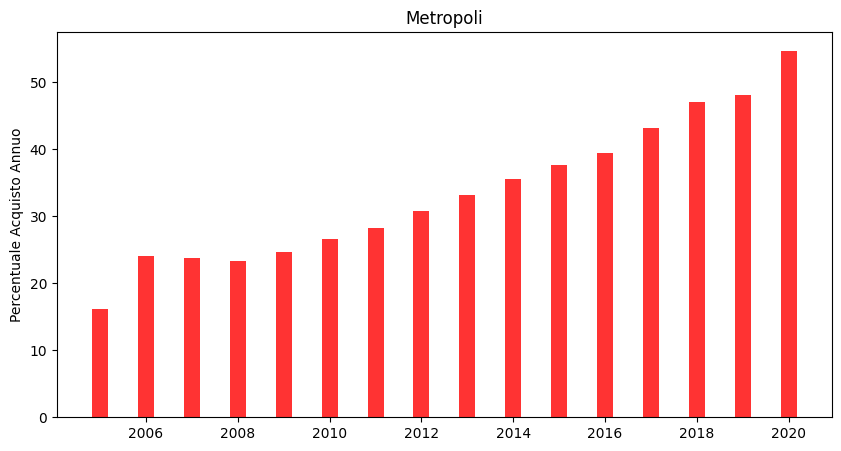

In [9]:
#Area Metropolitana
labels = anni
fig, ax = plt.subplots()
width = 0.35 
ax.bar(labels, Area_Metropolitana, width, alpha = 0.8, color="Red")

ax.set_ylabel('Percentuale Acquisto Annuo')
ax.set_title('Metropoli')
plt.show()

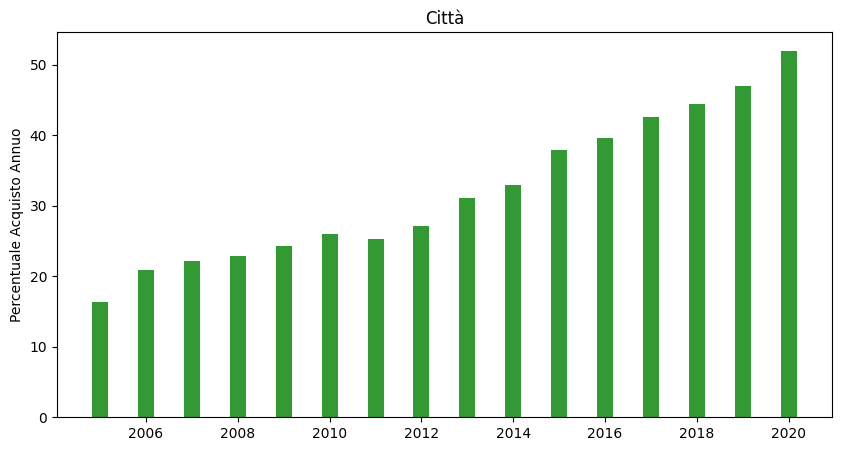

In [10]:
#Città
labels = anni
fig, ax = plt.subplots()

ax.bar(labels, Medie_Città, width, alpha = 0.8, color="Green")

ax.set_ylabel('Percentuale Acquisto Annuo')
ax.set_title('Città')
plt.rc('figure', figsize=(10.0, 5.0))
plt.show()

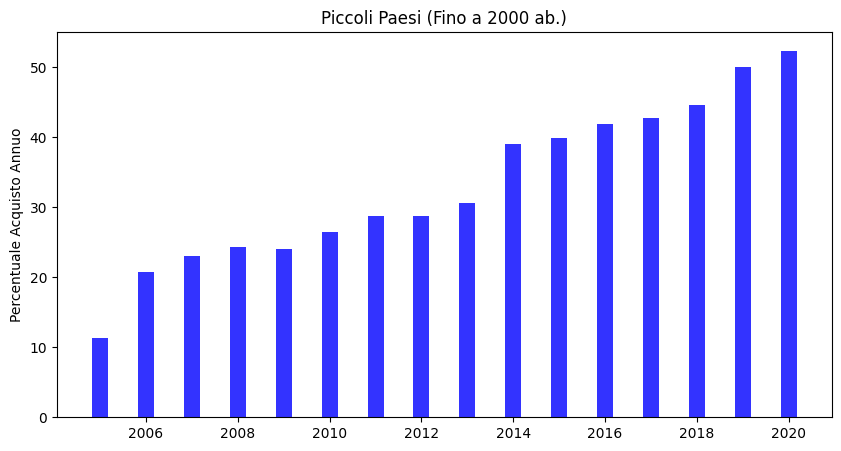

In [11]:
#Piccoli Paesi
labels = anni
fig, ax = plt.subplots()

ax.bar(labels, Piccoli_Paesi, width, alpha = 0.8, color="Blue")

ax.set_ylabel("Percentuale Acquisto Annuo")
ax.set_title('Piccoli Paesi (Fino a 2000 ab.)')
plt.rc('figure', figsize=(10.0, 5.0))
plt.show()

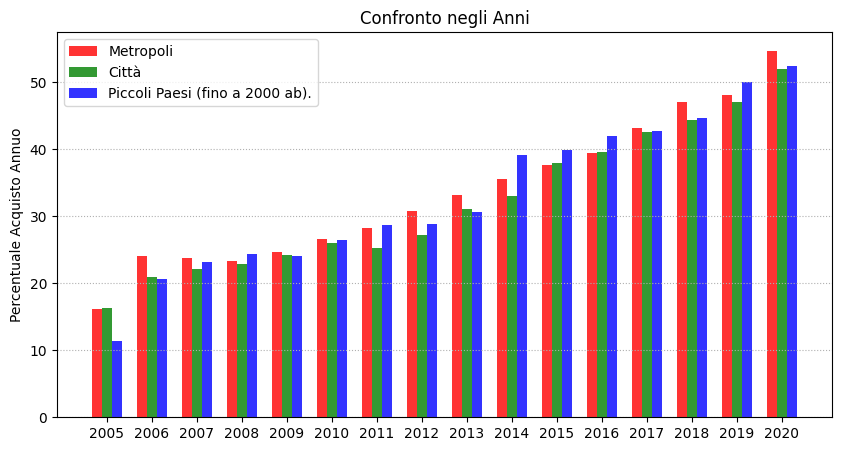

In [19]:
#Mixed
labels = anni
Città = Area_Metropolitana
Medie = Medie_Città
Paesi = Piccoli_Paesi
width = 0.22       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()


x = np.arange(len(labels))  # the label locations

ax.bar(x - width, Città, width, label='Metropoli', alpha = 0.8, color="Red")
ax.bar(x, Medie, width, label='Città', alpha = 0.8, color="Green")
ax.bar(x + width, Paesi, width, label='Piccoli Paesi (fino a 2000 ab).', alpha = 0.8, color="Blue")



ax.set_xticks(x, labels)
plt.grid(axis = 'y', linestyle=':')
ax.set_ylabel('Percentuale Acquisto Annuo')
ax.set_title('Confronto negli Anni')
ax.legend()
plt.show()